In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


def get_main_track(file):
    data = np.load(file, allow_pickle=True)
    main_track = np.array([v for v in data['steps'] if v['parent_id'] == 0])
    return main_track

def get_secondary_track(file):
    data = np.load(file, allow_pickle=True)
    if len(np.unique(data['steps']['parent_id'])) > 1:
        main_track = np.array([v for v in data['steps'] if v['parent_id'] == 1])
        return main_track
    else:
        return None


def get_all_tracks(file):
    data = np.load(file, allow_pickle=True)
    parent_ids = np.unique(data['steps']['g4id'])
    tracks = {}
    for p in parent_ids:
        tracks[p] = np.array([v for v in data['steps'] if v['g4id'] == p])
    return tracks



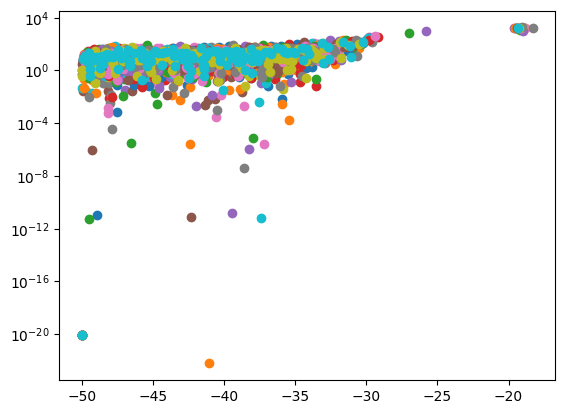

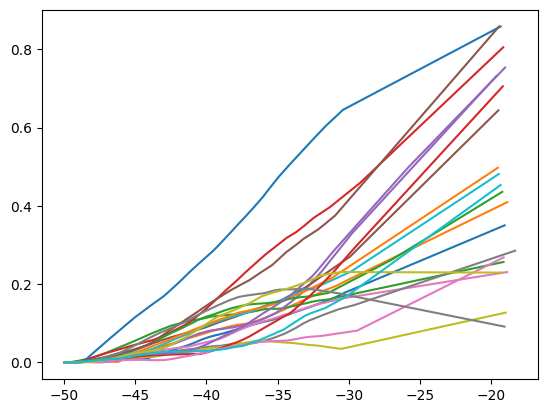

In [13]:
alpha_tracks = [get_main_track(f'alpha/ftfp/{f}') for f in os.listdir('alpha/ftfp')]
# plt.xlim(-50,50)
for a in alpha_tracks:
    plt.scatter(a['z_um'], a['Edep_keV'])
plt.semilogy()
plt.show()

for a in alpha_tracks:
    plt.plot(a['z_um'], np.sqrt(a['x_um']**2+a['y_um']**2))
plt.show()